In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
import re
from Constants import *
from Preprocessing import *
from Models import *
from scipy.spatial.distance import cdist

../data/models/


In [2]:
# def load_trained_models():
#     files = [Const.model_dir + f for f in Const.tuned_transition_models]
#     decision_file = Const.model_dir + Const.tuned_decision_model
#     [model1,model2,model3] = [torch.load(file) for file in files]
#     decision_model = torch.load(decision_file)
#     return decision_model, model1,model2,model3
# decision_model, transition_model1, transition_model2, outcome_model =load_trained_models()
# decision_model

In [108]:
files = [
    '../data/models/final_decision_model_statedecisions_input132_dims600_dropout0.5,0.9.pt',
    '../data/models/final_transition1_model_state1_input63_dims1000_dropout0.5,0.9.pt',
    '../data/models/final_transition2_model_state2_input85_dims500,500_dropout0.5,0.9.pt',
    '../data/models/final_outcome_model_state1_input83_dims500,500_dropout0.5,0.9.pt',
]
decision_model,transition_model1,transition_model2, outcome_model = [torch.load(file) for file in files]
decision_model.memory

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [15]:
data = DTDataset()
newdf = data.processed_df.copy()
for c in newdf.columns:
    if newdf[c].dtype == np.float64:
        newdf[c] = newdf[c].astype(np.float32).apply(lambda x: np.round(x,2))
data.processed_df = newdf
data.processed_df

/home/evl/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (55) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


,hpv,age,packs_per_year,smoking_status,gender,Aspiration rate Pre-therapy,total_dose,dose_fraction,1A1B,1A6,...,SD Primary 2,CR Nodal 2,PR Nodal 2,SD Nodal 2,Decision 1 (Induction Chemo) Y/N,Decision 2 (CC / RT alone),Decision 3 Neck Dissection (Y/N),Overall Survival (4 Years),FT,Aspiration rate Post-therapy
id,,,,,,,,,,,,,,,,,,,,,
3,1,55.97,0.0,0.0,1,0,66.00,2.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,0,0
5,0,20.95,38.0,1.0,1,0,72.00,1.80,0.0,0.0,...,0.0,1.0,0.0,0.0,0,1,0,0,1,0
6,1,69.93,35.0,1.0,0,1,70.00,2.12,0.0,0.0,...,0.0,1.0,0.0,0.0,0,1,0,0,1,1
7,1,72.32,0.0,1.0,1,0,70.00,2.12,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,1,0
8,1,59.73,0.0,0.0,1,0,66.00,2.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10201,1,49.57,30.0,1.0,1,0,70.00,2.12,0.0,0.0,...,0.0,0.0,1.0,0.0,0,1,0,1,0,0
10202,0,48.71,30.0,1.0,1,0,72.00,1.71,0.0,0.0,...,0.0,0.0,1.0,0.0,0,1,1,1,1,0
10203,1,77.12,0.0,0.0,1,0,70.00,2.33,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,1,1,0,0


In [16]:
test_patient_id = 7
test_patient = data.processed_df.loc[test_patient_id].to_dict()
test_patient

{'hpv': 1,
 'age': 72.32,
 'packs_per_year': 0.0,
 'smoking_status': 1.0,
 'gender': 1,
 'Aspiration rate Pre-therapy': 0,
 'total_dose': 70.0,
 'dose_fraction': 2.12,
 '1A1B': 0.0,
 '1A6': 0.0,
 '1B2A': 0.0,
 '1B3': 0.0,
 '2A2B': 1.0,
 '2A3': 1.0,
 '2B5A': 0.0,
 '34': 0.0,
 '35A': 0.0,
 '36': 0.0,
 '45B': 0.0,
 '46': 0.0,
 '5A5B': 0.0,
 'ips_spread': 0.4,
 'contra_spread': 0.0,
 '1A': 0.0,
 '1B': 0.0,
 '2A': 1.0,
 '2B': 1.0,
 '3': 1.0,
 '4': 0.0,
 '5A': 0.0,
 '5B': 0.0,
 '6': 0.0,
 'RPLN': 0.0,
 'bilateral': False,
 'cc_none': 1,
 'cc_platinum': 0,
 'cc_cetuximab': 0,
 'cc_others': 0,
 'no_dose_adjustment': 1,
 'dose_modified': 0,
 'dose_delayed': 0,
 'dose_cancelled': 0,
 'dose_delayed_&_modified': 0,
 'regiment_modification': 0,
 'unknown': 0,
 'T-category_1': 1,
 'T-category_2': 0,
 'T-category_3': 0,
 'T-category_4': 0,
 'N-category_0': 0,
 'N-category_1': 0,
 'N-category_2': 1,
 'N-category_3': 0,
 'AJCC_1': 0,
 'AJCC_2': 1,
 'AJCC_3': 0,
 'AJCC_4': 0,
 'Pathological Grade_0': 1,

In [17]:
def df_to_torch(df,ttype  = torch.FloatTensor):
    values = df.values.astype(float)
    values = torch.from_numpy(values)
    return values.type(ttype)

def get_decision_input(dataset,state=0,ids=None):
    baseline = data.get_state('baseline')
    dlt1 = data.get_state('dlt1')
    dlt2 = data.get_state('dlt2')
    pd1 = data.get_state('pd_states1')
    pd2 = data.get_state('pd_states2')
    nd1 = data.get_state('nd_states1')
    nd2 = data.get_state('nd_states2')
    modifications = data.get_state('modifications')
    ccs = data.get_state('ccs')
    if state < 2:
        pd = pd1.copy()
        nd = nd1.copy()
        dlt2.values[:,:] = np.zeros(dlt2.shape)
        ccs.values[:,:] = np.zeros(ccs.shape)
        if state < 1:
            dlt1.values[:,:] = np.zeros(dlt1.shape)
            modifications.values[:,:] = np.zeros(modifications.shape)
            pd.values[:,:] = np.zeros(pd.shape)
            nd.values[:,:] = np.zeros(nd.shape)
    else:
        pd = pd2.copy()
        nd = nd2.copy()
        
    output = [baseline, dlt1, dlt2, pd, nd,ccs,modifications]
    if ids is not None:
        output = [o.loc[ids] for o in output]
    return output
get_decision_input(data,ids=[test_patient_id])[0]

,1A,1A1B,1A6,1B,1B2A,1B3,2A,2A2B,2A3,2B,...,ln_cluster_3,ln_cluster_4,packs_per_year,smoking_status,subsite_BOT,subsite_GPS,subsite_NOS,subsite_Soft palate,subsite_Tonsil,total_dose
id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0.0,1.0,0,0,1,0,0,70.0


In [18]:
def get_inputkey_order(dataset,state=0):
    return [list(f.columns) for f in get_decision_input(dataset,state=state)]

get_inputkey_order(data)

[['1A',
  '1A1B',
  '1A6',
  '1B',
  '1B2A',
  '1B3',
  '2A',
  '2A2B',
  '2A3',
  '2B',
  '2B5A',
  '3',
  '34',
  '35A',
  '36',
  '4',
  '45B',
  '46',
  '5A',
  '5A5B',
  '5B',
  '6',
  'AJCC_1',
  'AJCC_2',
  'AJCC_3',
  'AJCC_4',
  'Aspiration rate Pre-therapy',
  'DLT (Y/N)',
  'DLT_Grade',
  'N-category_0',
  'N-category_1',
  'N-category_2',
  'N-category_3',
  'Pathological Grade_0',
  'Pathological Grade_1',
  'Pathological Grade_2',
  'Pathological Grade_3',
  'Pathological Grade_4',
  'RPLN',
  'T-category_1',
  'T-category_2',
  'T-category_3',
  'T-category_4',
  'age',
  'bilateral',
  'contra_spread',
  'dose_fraction',
  'gender',
  'hpv',
  'ips_spread',
  'ln_cluster_1',
  'ln_cluster_2',
  'ln_cluster_3',
  'ln_cluster_4',
  'packs_per_year',
  'smoking_status',
  'subsite_BOT',
  'subsite_GPS',
  'subsite_NOS',
  'subsite_Soft palate',
  'subsite_Tonsil',
  'total_dose'],
 ['DLT_Vascular',
  'DLT_Infection (Pneumonia)',
  'DLT_Other',
  'DLT_Neurological',
  'DLT_

In [94]:
def get_embeddings(dataset,dm,states=[0,1,2],use_saved_memory=True):
    embeddings = []
    inputs = []
    decisions_optimal = [[] for i in states]
    decisions_imitation = [[] for i in states]
    for i,state in enumerate(states):
        x = get_decision_input(dataset,state=state)
        x = torch.cat([df_to_torch(f) for f in x],axis=1)
        embedding = dm.get_embedding(x,position = state,use_saved_memory=use_saved_memory)
        inputs.append(x.detach().numpy())
        decision = dm(x,position=state).cpu().detach().numpy()
        decisions_optimal[i].append(decision[:,state])
        decisions_imitation[i].append(decision[:,state+3])
        embeddings.append(embedding.cpu().detach().numpy())
    return embeddings,np.array(decisions_optimal).reshape(len(states),-1).T, np.array(decisions_imitation).reshape(len(states),-1).T, inputs
embeddings, decisions_optimal, decisions_imitation, testinputs = get_embeddings(data,decision_model)
[e.shape for e in embeddings]

[(536, 600), (536, 600), (536, 600)]

In [31]:
testinputs[0].shape

(536, 95)

In [103]:
def get_embedding_df(dataset,dm,states=[0,1,2],**kwargs):
    embeddings, decisions_opt, decisions_imitation, embedding_inputs = get_embeddings(dataset,dm,
                                                                                      states=states,**kwargs)
    values = {'embeddings_state'+str(i): [np.array(ee) for ee in e] for i,e in zip(states,embeddings)}
    newdf = pd.DataFrame(values,index=dataset.processed_df.index.values)
    for ii in states:
        opt = decisions_optimal[:,ii]
        im = decisions_imitation[:,ii]
        newdf['decision'+str(ii)+"_optimal"] = opt
        newdf['decision'+str(ii)+'_imitation'] = im
        newdf['inputs'+str(ii)] = [np.array(ee) for ee in embedding_inputs[ii]]
    return newdf

embedding_df = get_embedding_df(data,decision_model)
embedding_df

,embeddings_state0,embeddings_state1,embeddings_state2,decision0_optimal,decision0_imitation,inputs0,decision1_optimal,decision1_imitation,inputs1,decision2_optimal,decision2_imitation,inputs2
3,"[0.18950315, 0.21675947, 0.98567593, 0.0, 0.0,...","[0.28579283, 0.17957234, 0.92037046, 0.0, 0.0,...","[0.0, 0.15877771, 0.84413487, 0.0, 0.0, 0.4315...",0.476590,0.883346,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.612241,0.254612,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.543404,0.046935,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
5,"[0.21757315, 0.16605812, 0.3304668, 0.0, 0.299...","[0.19947085, 0.21450993, 0.05421729, 0.0, 0.35...","[0.0, 0.2789797, 0.29972133, 0.051744536, 0.10...",0.465736,0.426374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.505735,0.655470,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.514068,0.093336,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"[0.75072455, 0.0, 0.0, 0.0, 0.0, 0.056603763, ...","[0.7211832, 0.0, 0.0, 0.0, 0.04895151, 0.02202...","[0.6301577, 0.0, 0.0, 0.0, 0.0, 0.16604272, 0....",0.579347,0.341708,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.520825,0.957621,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.556596,0.956222,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
7,"[0.58300173, 0.0, 0.13500945, 0.0, 0.0, 0.0, 0...","[0.564297, 0.0, 0.17739947, 0.0, 0.0, 0.0, 0.2...","[0.42993328, 0.0, 0.15472719, 0.0, 0.0, 0.0, 0...",0.479053,0.924016,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.568796,0.216959,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.565492,0.372844,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
8,"[0.0, 0.0, 1.1746897, 0.0, 0.4635709, 0.619434...","[0.0, 0.0, 1.0176234, 0.0, 0.5588224, 0.555169...","[0.0, 0.0, 0.97687805, 0.0, 0.28130776, 0.7091...",0.423606,0.824970,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.601900,0.028136,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.506405,0.015862,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10201,"[0.06172839, 0.25672057, 1.1533941, 0.42574996...","[0.10902223, 0.3093748, 1.0415204, 0.42010292,...","[0.0, 0.3983693, 1.2606322, 0.5171312, 0.0, 0....",0.497685,0.866182,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.566526,0.224303,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.538191,0.097473,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10202,"[0.331726, 0.0, 0.030801855, 0.045873087, 0.0,...","[0.29612222, 0.0, 0.03378499, 0.113925435, 0.0...","[0.12749295, 0.0, 0.085370526, 0.080164135, 0....",0.522407,0.528146,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.522994,0.522667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.584289,0.325063,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
10203,"[0.0, 0.0, 1.6151423, 0.0, 0.0, 0.18227875, 0....","[0.0, 0.0, 1.5177959, 0.0, 0.0, 0.11653921, 0....","[0.0, 0.0, 1.5591257, 0.0, 0.0, 0.20988578, 0....",0.439647,0.917346,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.581054,0.137969,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.493059,0.039867,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
10204,"[0.24823493, 0.50625753, 0.0, 0.0, 0.0, 0.0, 0...","[0.29154631, 0.60299224, 0.0, 0.0, 0.0, 0.0, 0...","[0.15579782, 0.56609875, 0.0, 0.0, 0.0, 0.0, 0...",0.443947,0.593044,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.519630,0.316167,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.483962,0.120677,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."


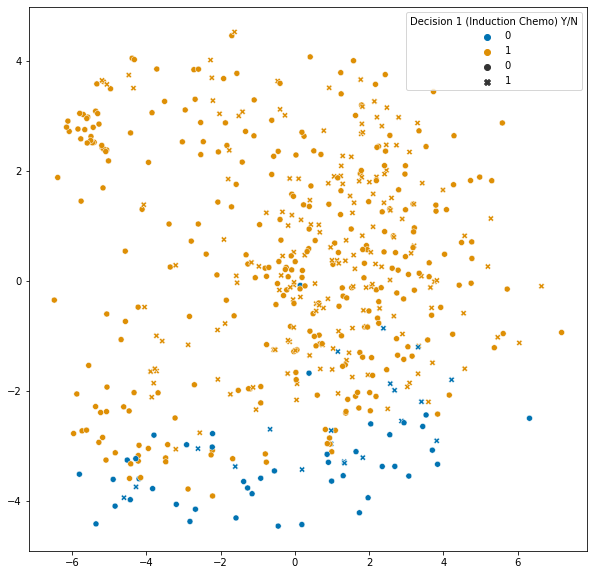

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def plot_embedding(dataset,dmodel,decision=0,ax=None,use_optimal=False):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(10,10))
    embeddings, decisions_optimal, decisions_imitation,inputs = get_embeddings(dataset,dmodel,states=[decision])
    pca = PCA(2)
    coords = pca.fit_transform(embeddings[0])
    marks = data.get_state('decision'+ str(decision+1))
    if use_optimal:
        predicted = (decisions_optimal > .5).ravel().astype(int)
    else:
        predicted = (decisions_imitation > .5).ravel().astype(int)
    size = [400 for i in marks]
    sns.scatterplot(data=coords,
                    x=coords[:,0],
                    y=coords[:,1],
                    style=marks,
                    hue=predicted,
                    ax=ax,
                    palette='colorblind',
                    sizes=size,
                   )
plot_embedding(data,decision_model)

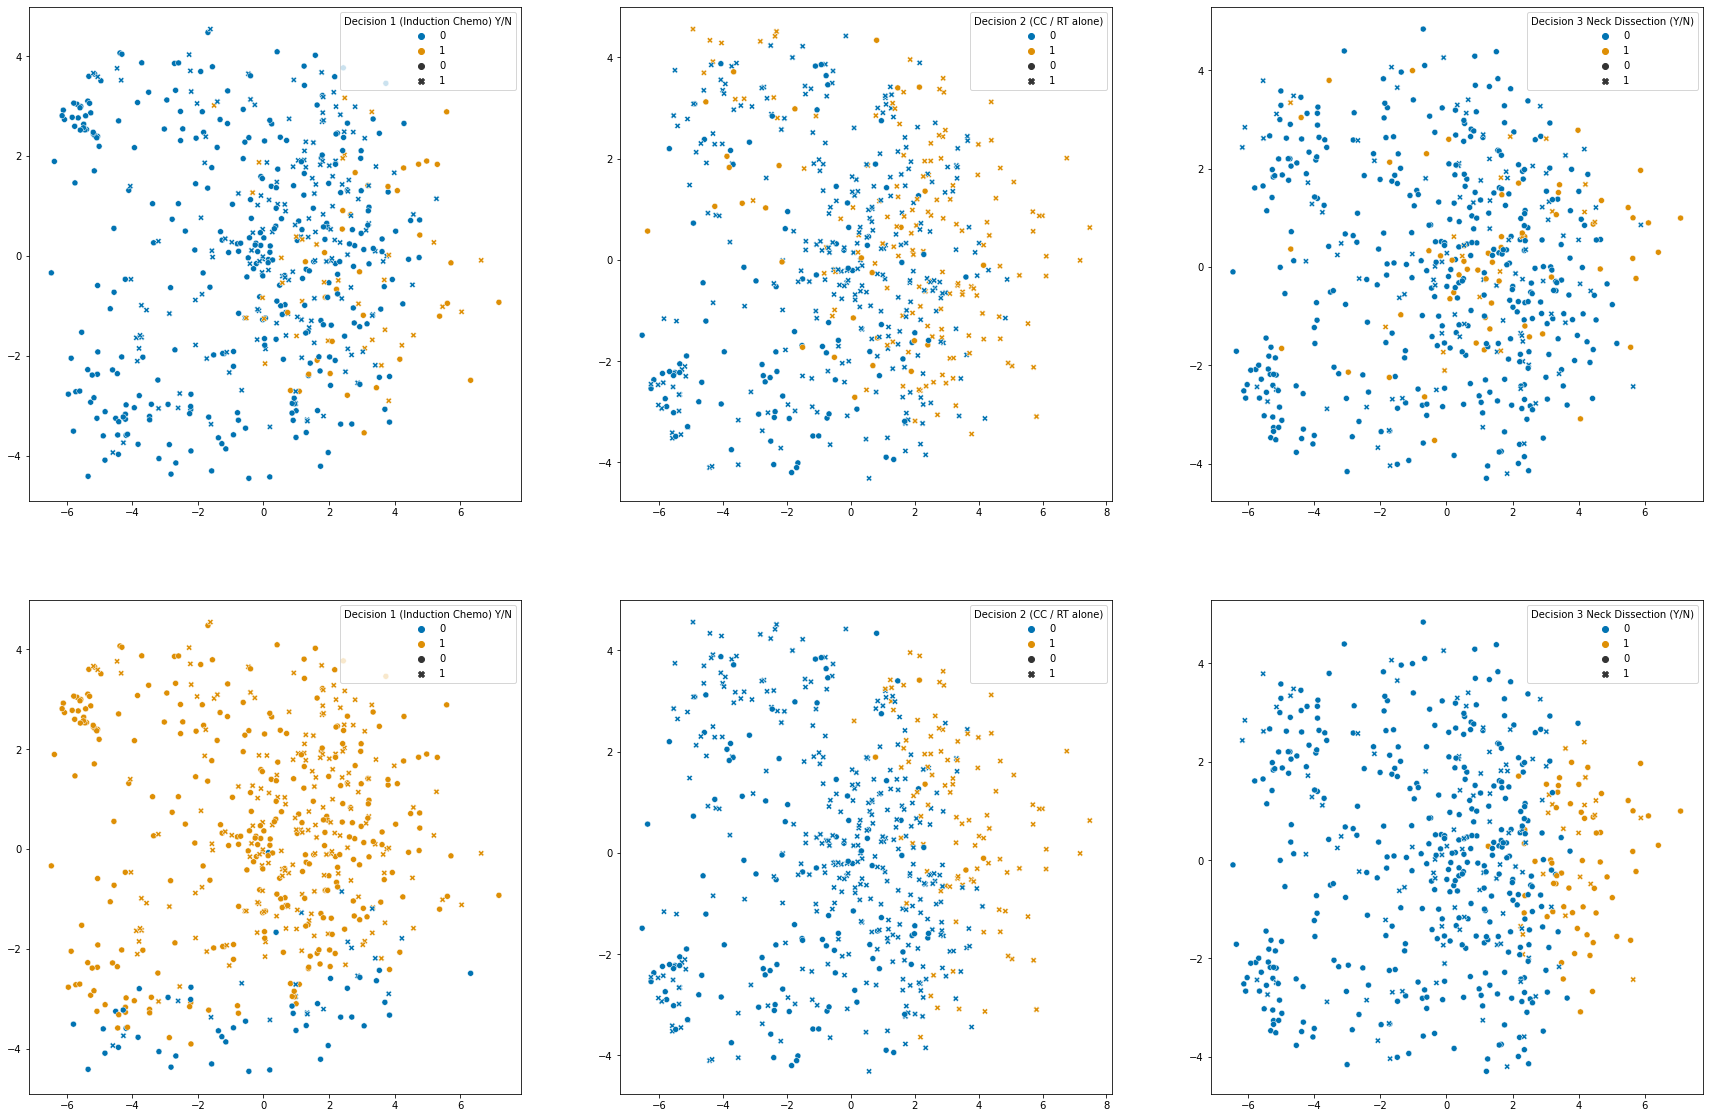

In [112]:
fig,axes = plt.subplots(2,3,figsize=(30,20))
for ii,opt in enumerate([True,False]):
    for i in range(3):
        plot_embedding(data,decision_model,use_optimal=opt,decision=i,ax=axes[ii,i])

In [24]:
def get_default_input(dataset,state=0,ids=None):
    output = get_decision_input(dataset,state=state,ids=ids)
    output = [o.median().to_dict() for o in output]
    return output

get_default_input(data)

[{'1A': 0.0,
  '1A1B': 0.0,
  '1A6': 0.0,
  '1B': 0.0,
  '1B2A': 0.0,
  '1B3': 0.0,
  '2A': 1.0,
  '2A2B': 1.0,
  '2A3': 0.0,
  '2B': 1.0,
  '2B5A': 0.0,
  '3': 0.0,
  '34': 0.0,
  '35A': 0.0,
  '36': 0.0,
  '4': 0.0,
  '45B': 0.0,
  '46': 0.0,
  '5A': 0.0,
  '5A5B': 0.0,
  '5B': 0.0,
  '6': 0.0,
  'AJCC_1': 0.0,
  'AJCC_2': 0.0,
  'AJCC_3': 0.0,
  'AJCC_4': 0.0,
  'Aspiration rate Pre-therapy': 0.0,
  'DLT (Y/N)': 0.0,
  'DLT_Grade': 0.0,
  'N-category_0': 0.0,
  'N-category_1': 0.0,
  'N-category_2': 0.0,
  'N-category_3': 0.0,
  'Pathological Grade_0': 0.0,
  'Pathological Grade_1': 0.0,
  'Pathological Grade_2': 0.0,
  'Pathological Grade_3': 1.0,
  'Pathological Grade_4': 0.0,
  'RPLN': 0.0,
  'T-category_1': 0.0,
  'T-category_2': 0.0,
  'T-category_3': 0.0,
  'T-category_4': 0.0,
  'age': 58.155,
  'bilateral': 0.0,
  'contra_spread': 0.0,
  'dose_fraction': 2.12,
  'gender': 1.0,
  'hpv': 1.0,
  'ips_spread': 0.4,
  'ln_cluster_1': 1.0,
  'ln_cluster_2': 0.0,
  'ln_cluster_3': 

In [25]:
def format_patient(dataset,input_dict):
    #converts patient input features into data input type
    baselines = dataset.processed_df.median().to_dict()
    for k,v in input_dict.items():
        baselines[k] = v
    return baselines

format_patient(data,{'ln_cluster_3': 1,'DLT_Neurological': 1})

{'hpv': 1.0,
 'age': 58.155,
 'packs_per_year': 3.0,
 'smoking_status': 0.5,
 'gender': 1.0,
 'Aspiration rate Pre-therapy': 0.0,
 'total_dose': 70.0,
 'dose_fraction': 2.12,
 '1A1B': 0.0,
 '1A6': 0.0,
 '1B2A': 0.0,
 '1B3': 0.0,
 '2A2B': 1.0,
 '2A3': 0.0,
 '2B5A': 0.0,
 '34': 0.0,
 '35A': 0.0,
 '36': 0.0,
 '45B': 0.0,
 '46': 0.0,
 '5A5B': 0.0,
 'ips_spread': 0.4,
 'contra_spread': 0.0,
 '1A': 0.0,
 '1B': 0.0,
 '2A': 1.0,
 '2B': 1.0,
 '3': 0.0,
 '4': 0.0,
 '5A': 0.0,
 '5B': 0.0,
 '6': 0.0,
 'RPLN': 0.0,
 'bilateral': 0.0,
 'cc_none': 0.0,
 'cc_platinum': 0.0,
 'cc_cetuximab': 0.0,
 'cc_others': 0.0,
 'no_dose_adjustment': 1.0,
 'dose_modified': 0.0,
 'dose_delayed': 0.0,
 'dose_cancelled': 0.0,
 'dose_delayed_&_modified': 0.0,
 'regiment_modification': 0.0,
 'unknown': 0.0,
 'T-category_1': 0.0,
 'T-category_2': 0.0,
 'T-category_3': 0.0,
 'T-category_4': 0.0,
 'N-category_0': 0.0,
 'N-category_1': 0.0,
 'N-category_2': 0.0,
 'N-category_3': 0.0,
 'AJCC_1': 0.0,
 'AJCC_2': 0.0,
 'AJCC_3

In [43]:
torch.tensor(format_patient(data,test_patient)['age']).type(torch.FloatTensor)

tensor(72.3200)

In [97]:
def dict_to_model_input(dataset,fdict,state=0,ttype=torch.FloatTensor,concat=True):
    fdict = format_patient(dataset,fdict)
    order = get_inputkey_order(dataset,state=state)
    inputs = [torch.tensor([fdict[k] for k in ordersubset]).type(ttype).view(1,-1) for ordersubset in order]
    
    #this is assuming the order is baseline, dlt1, dlt2, primary progression, nodal progression, cc type, dose modification
    def zeroinput(position):
        return torch.zeros(inputs[position].shape).type(ttype)
    if state == 0 or state == 1:
        inputs[2] = zeroinput(2)
        inputs[5] = zeroinput(5)
    if state < 1:
        inputs[1] = zeroinput(1)
        inputs[3] = zeroinput(3)
        inputs[4] = zeroinput(4)
        inputs[6] =zeroinput(6)
    if concat:
        inputs = torch.cat(inputs,axis=1)
    #currently at this line its baseline, dlt1, dlt2, pd, nd, cc, modifications
    return inputs
# decision_model(*dict_to_model_input(data,data.processed_df.iloc[7].to_dict(),state=0),position=0)
dict_to_model_input(data,data.processed_df.loc[5].to_dict(),state=2,concat=True)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000, 20.9500,  0.0000,  0.0000,  1.8000,  1.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000, 38.0000,  1.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000, 72.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

In [79]:
testid = 7
test = [f.values for f in get_decision_input(data,ids=[testid],state=2)]
order = [f.columns for f in get_decision_input(data,ids=[testid],state=2)]
pos0 = 0
for i,ii in zip(test,dict_to_model_input(data,test_patient,state=2,concat=False)):
    ii = ii.detach().numpy()[0]
    i = i.astype(float)[0]
    pos = 0
    for iit, it in zip(ii,i):
        if iit != it:
            print(order[pos0][pos],it,iit)
        pos += 1
    pos0+=1
    print(np.mean([iit == it for iit,it in zip(ii,i)]))

age 72.32 72.32
dose_fraction 2.12 2.12
ips_spread 0.4 0.4
0.9516129032258065
1.0
1.0
1.0
1.0
1.0
1.0


In [113]:

def get_neighbors_and_embedding(pdata,dataset,decisionmodel,embedding_df=None,state=2,max_neighbors=10):
    decisionmodel.eval()
    if embedding_df is None:
        embedding_df = get_embedding_df(dataset,decisionmodel)
    embeddings = np.stack(embedding_df['embeddings_state'+str(state)].values)
    
    cat = lambda x: torch.cat(x,axis=1)
    
    inputs = dict_to_model_input(dataset,pdata,state=state)
    
    embedding_inputs = np.stack(embedding_df['inputs'+str(state)].values)
    
    embedding = decisionmodel.get_embedding(inputs,position=state,use_saved_memory=True)[0].view(1,-1).detach().numpy()

    dists = cdist(embedding,embeddings).ravel()
    
    max_neighbors = min(len(dists),max_neighbors)
    min_positions = np.argsort(dists)[:max_neighbors]
    min_dists = dists[min_positions]
    similarities = 1/(1+min_dists)
    return min_positions, similarities

get_neighbors_and_embedding(test_patient,data,decision_model)

(array([  3, 336, 140, 530, 250, 256, 226, 267, 219, 247]),
 array([0.99999735, 0.15983609, 0.1550538 , 0.15176661, 0.15167013,
        0.13551021, 0.13136039, 0.1305928 , 0.12906663, 0.12860865]))

In [109]:
def dictify(keys,values):
    return {k:v for k,v in zip(keys,values)}

def get_stuff_for_patient(patient_dict,data,tmodel1,tmodel2,outcomemodel,decisionmodel):
    #this takes a patient dict and returns the results for a full treatment simulation
    #currently this is only the baseline and I need to think more about what to do with fixed values?
    pdata = format_patient(data,patient_dict)
    baseline_inputs = dict_to_model_input(data,pdata,state=0,concat=False) 
    #inputs are order baseline, dlt1, dlt2, pd, nd, cc type, dose modifications
    #model output is nx6 -> optimal 1 , 2, 3, imitation 1, 2, 3
    cat = lambda x: torch.cat(x,axis=1)
    
    
    #do a loop for imitation and a loop for optimal decision making, mod = 3 is imitation
    format_transition = lambda x: torch.exp(x.view(1,-1))
    tmodel1.eval()
    tmodel2.eval()
    outcomemodel.eval()
    decisionmodel.eval()
    results = {}
    
    size_dict = decision_model.input_sizes
    
    #baseline, dlt1, dlt2, pd, nd, cc, mod
    input_keys = get_inputkey_order(data)
    def get_attention(xx, position, offset):
        attention = decision_model.get_attributions(xx,target=position+offset, position=1)[0].detach().numpy()
        attention_dict = {
            'step': position,
            'model': 'optimal' if offset == 0 else 'imitation',
            'range': [float(attention.min()),float(attention.max())],
            'baseline': dictify(input_keys[0],attention[0:size_dict['baseline']]),
        }
        pos = size_dict['baseline']
        attention_dict['dlt1'] = dictify(input_keys[1],attention[pos:pos+size_dict['dlt']])
        pos += size_dict['dlt']
        attention_dict['dlt2'] = dictify(input_keys[2], attention[pos:pos+size_dict['dlt']])
        pos += size_dict['dlt']
        attention_dict['pd'] = dictify(input_keys[3], attention[pos:pos+size_dict['pd']])
        pos += size_dict['pd']
        attention_dict['nd'] = dictify(input_keys[4], attention[pos:pos+size_dict['nd']])
        pos += size_dict['nd']
        attention_dict['cc'] = dictify(input_keys[5], attention[pos:pos+size_dict['cc']])
        pos += size_dict['cc']
        attention_dict['modifications'] = dictify(input_keys[6], attention[pos:])
        return attention_dict
        
    memory = get_decision_input(data,state=2)
    memory = torch.cat([df_to_torch(f) for f in memory],axis=1)
    o1 = decisionmodel(cat(baseline_inputs),position=0)[0]
    
    thresh = lambda x: torch.gt(x,.5).type(torch.FloatTensor)
    def run_simulation(modifier,decision1=None,decision2=None,decision3=None):
        #transition 1 model uses usebaline + decision
        if decision1 is not None:
            d1 = torch.tensor([[decision1]]).type(torch.FloatTensor)
            d1_attention=0
        else:
            d1 = o1[0+modifier].view(1,-1)
            d1_attention = get_attention(cat(baseline_inputs),0,modifier)
        tinput1 = torch.cat([baseline_inputs[0],thresh(d1)],axis=1)
        [ypd1,ynd1,ymod,ydlt1] = tmodel1(tinput1)
        [ypd1, ynd1, ymod] = [format_transition(i) for i in [ypd1,ynd1,ymod]]
        
        oinput2 = dict_to_model_input(data,pdata,state=1,concat=False)
        oinput2[1] = ydlt1.view(1,-1)
        oinput2[3] = ypd1
        oinput2[4] = ynd1
        oinput2[6] = ymod
        
        if decision2 is not None:
            d2 = torch.tensor([[decision2]]).type(torch.FloatTensor)
            d2_attention=0
        else:
            d2 = decision_model(cat(oinput2),position=1)[0,1+modifier].view(1,-1)
            d2_attention = get_attention(cat(oinput2),1,modifier)
        
        #transition 2 modle uses baseline + pd1 + nd1 + modification + dlt1 + decision 1 + deicsion 2
        tinput2 = [baseline_inputs[0], ypd1, ynd1, ymod,ydlt1, thresh(d1),thresh(d2)]

        tinput2 = torch.cat(tinput2,axis=1)
        [ypd2, ynd2, ycc, ydlt2] = tmodel2(tinput2)
        [ypd2, ynd2, ycc] = [format_transition(i) for i in [ypd2,ynd2,ycc]]
        
        oinput3 = oinput2[:]
        oinput3[2] = ydlt2.view(1,-1)
        oinput3[3] = ypd2
        oinput3[4] = ynd2
        oinput3[5] = ycc
        
        if decision3 is not None:
            d3 = torch.tensor([[decision3]]).type(torch.FloatTensor)
            d3_attention=0
        else:
            d3 = decision_model(cat(oinput3),position = 2)[0,2+modifier].view(1,-1)
            d3_attention = get_attention(cat(oinput3),2,modifier)
        
        #outcomes uses baseline + pd2 + nd2 + cc type + dlt2 + decision 1,2,3
        tinput3 = [baseline_inputs[0], ypd2, ynd2, ycc, ydlt2, thresh(d1), thresh(d2), thresh(d3)]
        tinput3 = torch.cat(tinput3,axis=1)
        outcomes = outcomemodel(tinput3)
        
        entry = {
            'outcomes': outcomes.detach().numpy()[0],
            'pd1': ypd1.detach().numpy()[0],
            'nd1': ynd1.detach().numpy()[0],
            'pd2': ypd2.detach().numpy()[0],
            'nd2': ynd2.detach().numpy()[0],
            'modifications': ymod.detach().numpy()[0],
            'cc_type': ycc.detach().numpy()[0],
            'dlt1': ydlt1.detach().numpy()[0],
            'dlt2': ydlt2.detach().numpy()[0],
            'decision1': d1.detach().numpy()[0][0],
            'decision2': d2.detach().numpy()[0][0],
            'decision3': d3.detach().numpy()[0][0],
            'decision1_attention': d1_attention,
            'decision2_attention': d2_attention,
            'decision3_attention': d3_attention,
        }
        key = 'optimal' if modifier < 1 else 'imitation'
        if decision1 is not None:
            key += '_decision1-'+str(decision1)
        if decision2 is not None:
            key += '_decision2-'+str(decision2)
        if decision3 is not None:
            key += '_decision3-'+str(decision3)
        results[key] = entry
    with torch.no_grad():
        for modifier in [0,3]:
            for d1_fixed in [None,0,1]:
                for d2_fixed in [None,0,1]:
                    for d3_fixed in [None,0,1]:
                        #we only need to do all fixed outcomes once
                        if d1_fixed is not None and d2_fixed is not None and d3_fixed is not None and modifier > 0:
                            continue
                        run_simulation(modifier,d1_fixed,d2_fixed,d3_fixed)
    return results

test_results = get_stuff_for_patient(test_patient,data,transition_model1,transition_model2,outcome_model,decision_model)
test_results

{'optimal': {'outcomes': array([0.8717207 , 0.15482949, 0.19618317], dtype=float32),
  'pd1': array([0.81629294, 0.16529834, 0.01840877], dtype=float32),
  'nd1': array([0.68757737, 0.2921134 , 0.02030929], dtype=float32),
  'pd2': array([0.7451693 , 0.24144718, 0.01338352], dtype=float32),
  'nd2': array([0.498553  , 0.4362636 , 0.06518341], dtype=float32),
  'modifications': array([0.9155882 , 0.01354994, 0.00814109, 0.03100739, 0.00677623,
         0.02014318, 0.00479398], dtype=float32),
  'cc_type': array([0.46358746, 0.27958325, 0.19746725, 0.05936207], dtype=float32),
  'dlt1': array([0.05549392, 0.1519623 , 0.16313784, 0.04689669, 0.11977044,
         0.04438996, 0.09919196, 0.03894072], dtype=float32),
  'dlt2': array([0.09890461, 0.12154599, 0.10158215, 0.01478866, 0.0983823 ,
         0.01760259, 0.04442185, 0.06567052], dtype=float32),
  'decision1': 0.40083015,
  'decision2': 0.47646314,
  'decision3': 0.48343608,
  'decision1_attention': {'step': 0,
   'model': 'optimal',

In [110]:
for k,v in test_results.items():
    print(k,v['outcomes'])

optimal [0.8717207  0.15482949 0.19618317]
optimal_decision3-0 [0.8717207  0.15482949 0.19618317]
optimal_decision3-1 [0.825432   0.13679878 0.2950911 ]
optimal_decision2-0 [0.8717207  0.15482949 0.19618317]
optimal_decision2-0_decision3-0 [0.8717207  0.15482949 0.19618317]
optimal_decision2-0_decision3-1 [0.825432   0.13679878 0.2950911 ]
optimal_decision2-1 [0.90109867 0.22224873 0.24340555]
optimal_decision2-1_decision3-0 [0.90109867 0.22224873 0.24340555]
optimal_decision2-1_decision3-1 [0.8617415  0.18564972 0.31862783]
optimal_decision1-0 [0.8717207  0.15482949 0.19618317]
optimal_decision1-0_decision3-0 [0.8717207  0.15482949 0.19618317]
optimal_decision1-0_decision3-1 [0.825432   0.13679878 0.2950911 ]
optimal_decision1-0_decision2-0 [0.8717207  0.15482949 0.19618317]
optimal_decision1-0_decision2-0_decision3-0 [0.8717207  0.15482949 0.19618317]
optimal_decision1-0_decision2-0_decision3-1 [0.825432   0.13679878 0.2950911 ]
optimal_decision1-0_decision2-1 [0.90109867 0.22224873 